In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.stats as st
import time

In [2]:
_path = "~D:/Vasiliev/Python/Jupyter/FebProject/New stats/21-04-analysis/";

В том анализе, который был показан, отличия в 2%, например, говорят о том, 
что самый горячий твэл в зоне в выбранном состоянии изменил мощность на 2%.

In [4]:
def PlotSeries(_name,legend_prefix,df1,_tvel_type):
    plt.figure(figsize=(12,10));
    print(max(df1));
    plt.grid(True);
    plt.xlabel('Всплески энерговыделения, %', fontsize=20);
    plt.ylabel('Частота', fontsize=20);
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    percent=95
    quant = st.scoreatpercentile(df1,percent);  
    plt.hist(df1,label='{}, {}(95%)={:.2f}'.format(legend_prefix,_name,quant),alpha=0.75, color='blue');    
    plt.vlines(quant,0,15,color='red')
    plt.legend(fontsize=20);
    plt.title(('Максимальное отклонение в энерговыделении {} твэлов').format(_tvel_type),fontsize=20);
    plt.show();

In [14]:
def PlotSeriesArray(_name,legend_prefix,_tvel_type,*df1):
    tm = ["begin", "middle", "end"];
    plt.figure(figsize=(12,10));
    plt.grid(True);
    plt.xlabel('Всплески энерговыделения, %', fontsize=20);
    plt.ylabel('Частота', fontsize=20);
    plt.xticks(fontsize=16);
    plt.yticks(fontsize=16);
    for i in range(len(df1)):
        plt.hist(df1[i],label='{} {}, {}'.format(tm[i],legend_prefix,_name),alpha=0.75);    
    plt.legend(fontsize=20);
    plt.title(('Максимальное отклонение в энерговыделении {} твэлов').format(_tvel_type),fontsize=20);
    plt.show();

In [56]:
def GetMaximumFromStateKK(_tab):
    max_dkr_1 = [];
    max_dkr_2 = [];
    _init = _tab.query('state == 0');
    for _state in range(1,100):
        if (_state == 19 or _state==20 ):
            continue;
        av = _tab.query('kr > 1.2').kr.mean()
        _stab = _tab.query('state == @_state & kr > @av');
        #_sdkr_tab = _stab.sort_values('dkr').tail(1);
        #max_dkr_1.append(_sdkr_tab.iloc[0].dkr);
        
        _skr_tab = _stab.sort_values('kr').tail(1);
        max_dkr_2.append(_skr_tab.iloc[0].dkr);
    # max_dkr_1 -> sorted by dkr
    # max_dkr_2 -> sorted by kr
    return max_dkr_2;

<div>В рамках расчета было проведено 2 различных расчета.</div>
<div>В первом расчете (<name>_1) были выбраны самые большие отклонения в KR. Анализ результатов показал, что
в такой анализ могут быть включены твэлы, абсолютная мощность которых относительно невелика, а порой и совсев маленькие. Поэтому для этого анализа было введено дополниьельное условие: абсолютная мощность твэла должна быть больше, чем средняя мощность всех твэлов. Введение мультипликаций позволяет получать распределения для твэл, мощность которых выше выбранного мультипликатором уровня. </div>
<div> Во втором расчете (<name>_2) для каждого состояния выбирался наиболее горячий твэл и в анализе использовалось значение отклонения его абсолютной мощности.</div>


15.578582002296518


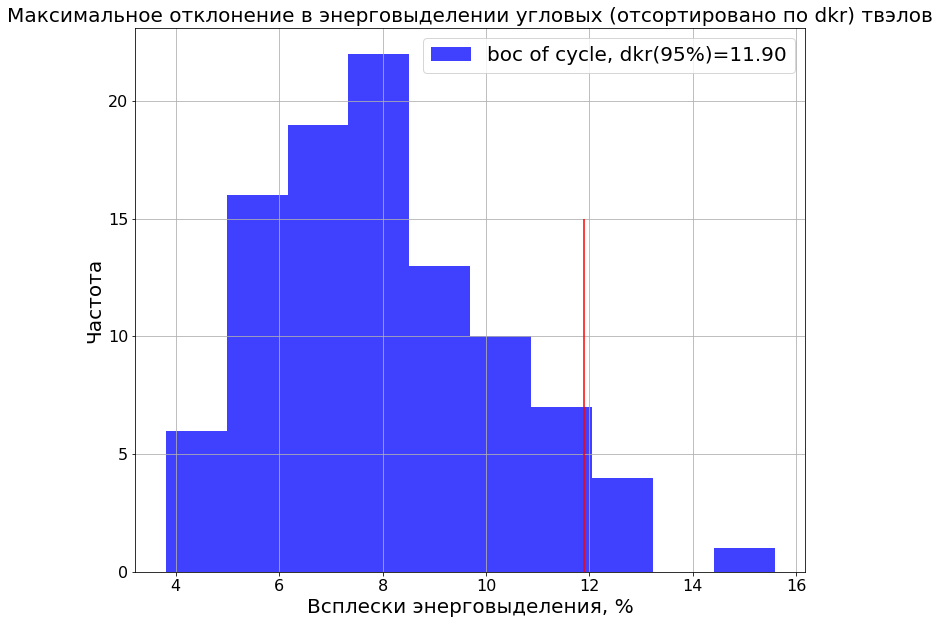

18.071978387477767


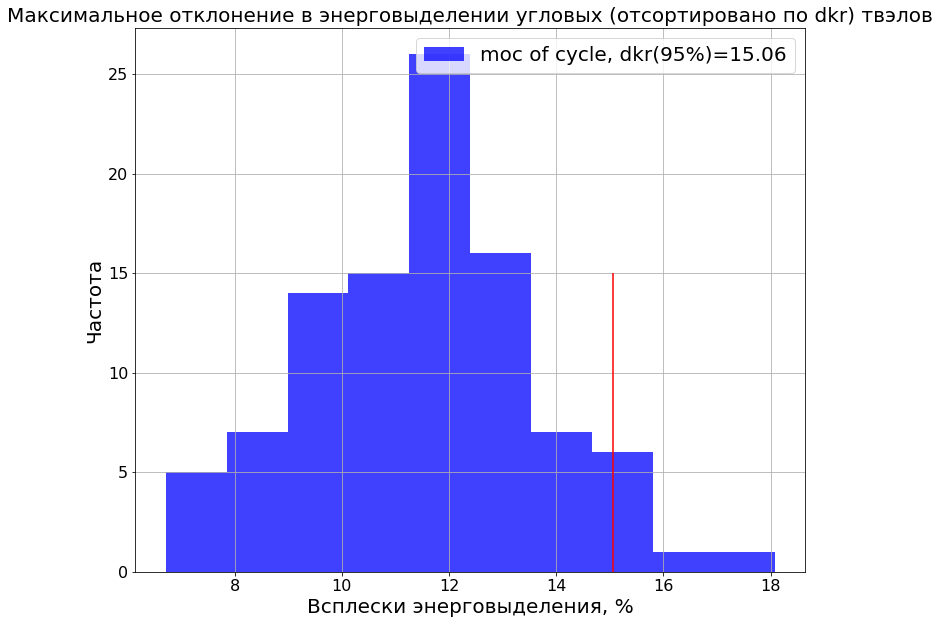

18.3689454473393


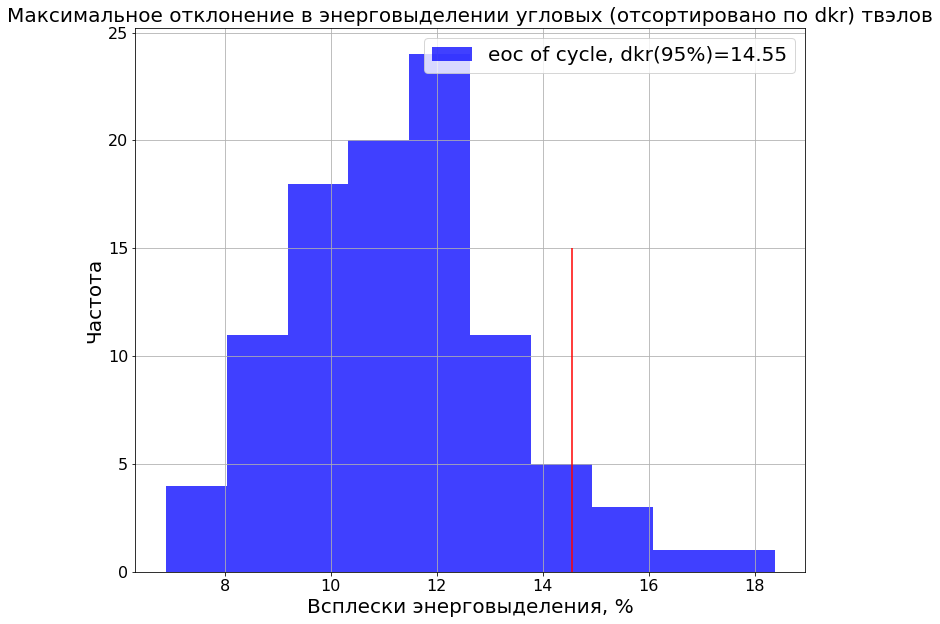

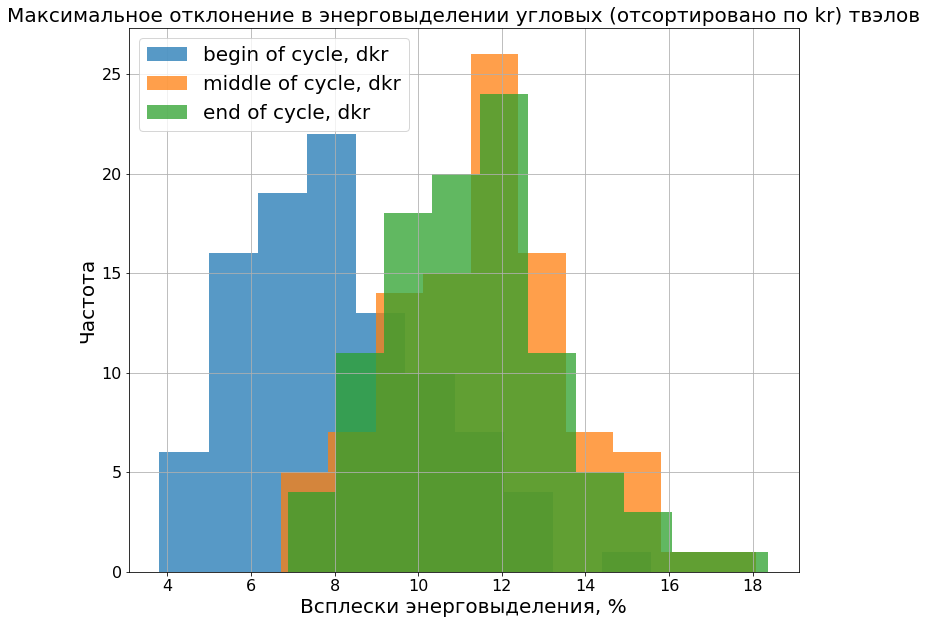

In [18]:
_b_table = pd.read_csv(_path + '_boc_cor_8n9d_table_april.csv');
_m_table = pd.read_csv(_path + '_moc_cor_8n9d_table_april.csv');
_e_table = pd.read_csv(_path + '_eoc_cor_8n9d_table_april.csv');
b1 = GetMaximumFromStateKK(_b_table)
m1 = GetMaximumFromStateKK(_m_table)
e1 = GetMaximumFromStateKK(_e_table)
PlotSeries('dkr','boc of cycle', b1, "угловых (отсортировано по dkr 8 - номинальная, 9 - отклоненная)")
PlotSeries('dkr','moc of cycle', m1, "угловых (отсортировано по dkr 8 - номинальная, 9 - отклоненная)")
PlotSeries('dkr','eoc of cycle', e1, "угловых (отсортировано по dkr 8 - номинальная, 9 - отклоненная)")
PlotSeriesArray('dkr','of cycle',  "угловых (отсортировано по kr 8 - номинальная, 9 - отклоненная)", b1,m1,e1)

15.088549847359


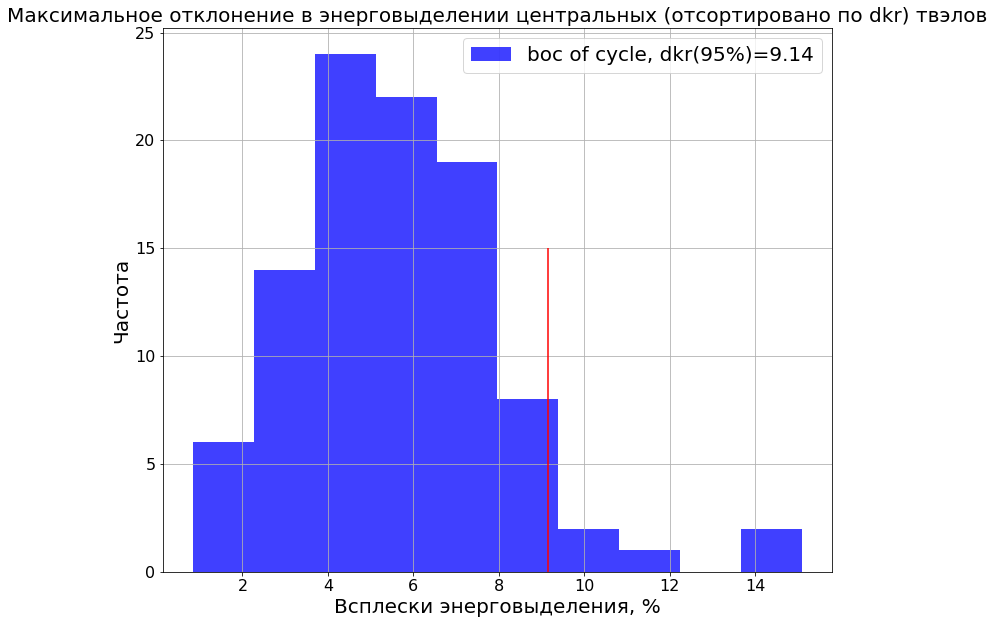

16.75396320751461


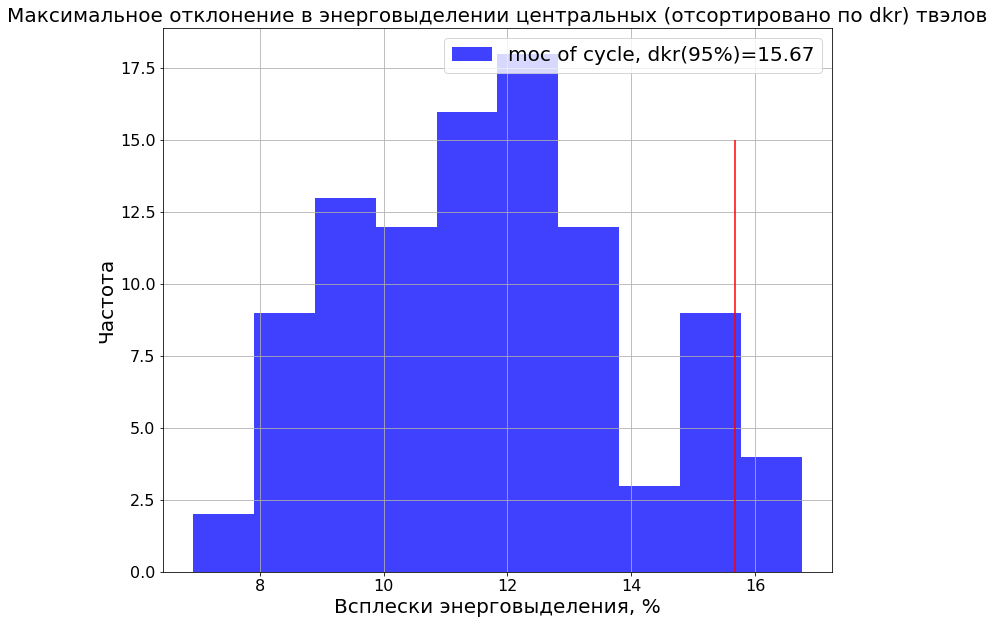

16.793444259648766


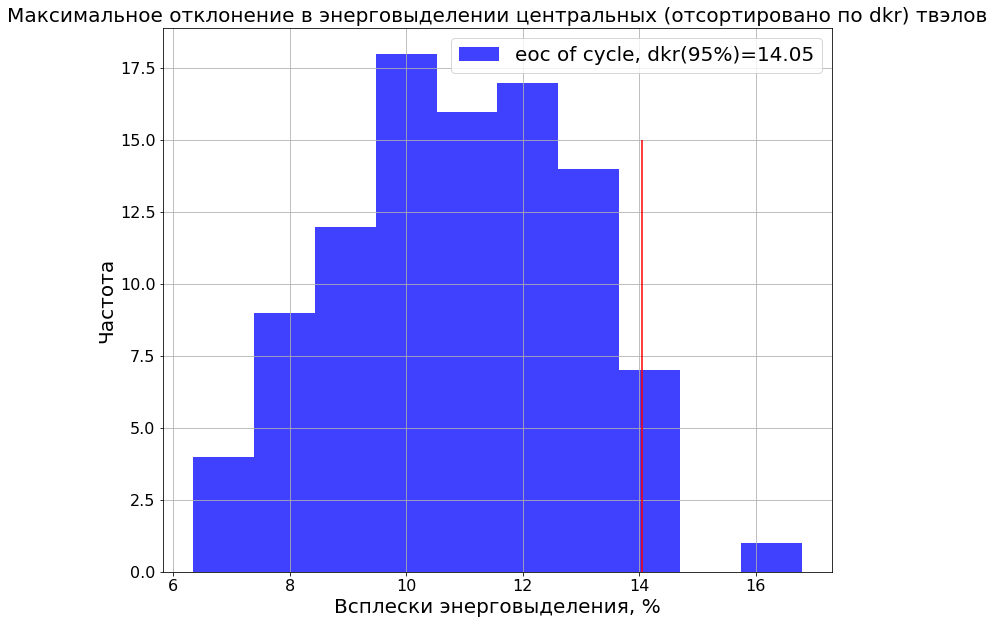

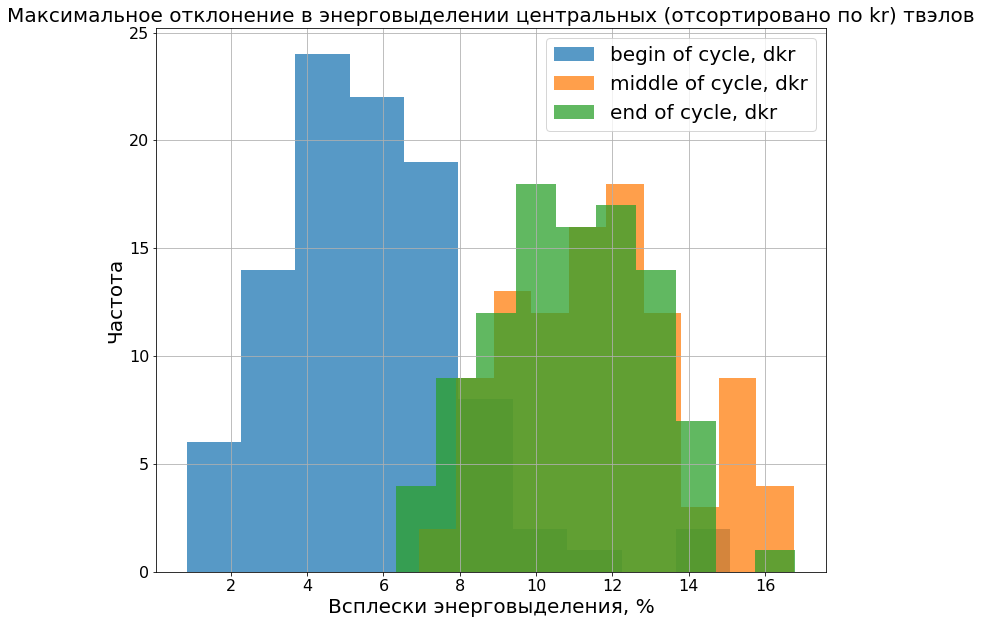

In [19]:
_b_table = pd.read_csv(_path + '_boc_cen_8n9d_table_april.csv');
_m_table = pd.read_csv(_path + '_moc_cen_8n9d_table_april.csv');
_e_table = pd.read_csv(_path + '_eoc_cen_8n9d_table_april.csv');
b1 = GetMaximumFromStateKK(_b_table)
m1 = GetMaximumFromStateKK(_m_table)
e1 = GetMaximumFromStateKK(_e_table)
PlotSeries('dkr','boc of cycle', b1, "центральных (отсортировано по dkr 8 - номинальная, 9 - отклоненная)")
PlotSeries('dkr','moc of cycle', m1, "центральных (отсортировано по dkr 8 - номинальная, 9 - отклоненная)")
PlotSeries('dkr','eoc of cycle', e1, "центральных (отсортировано по dkr 8 - номинальная, 9 - отклоненная)")
PlotSeriesArray('dkr','of cycle',  "центральных (отсортировано по kr 8 - номинальная, 9 - отклоненная)", b1,m1,e1)

16.234617060002616


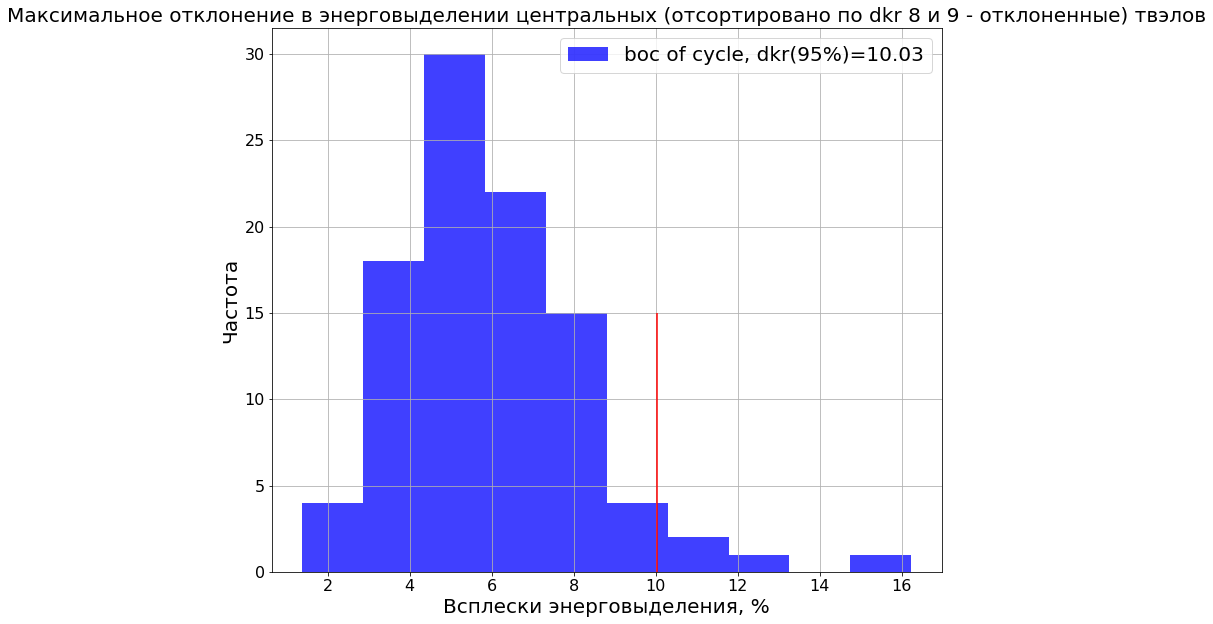

16.773489784769474


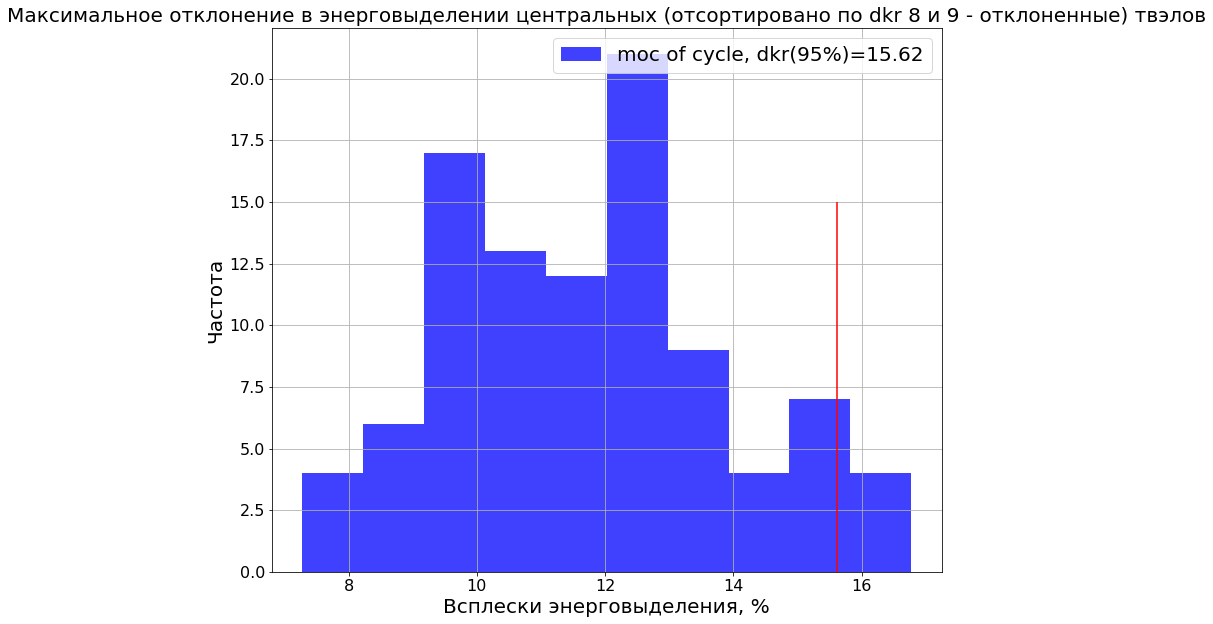

16.80390936549481


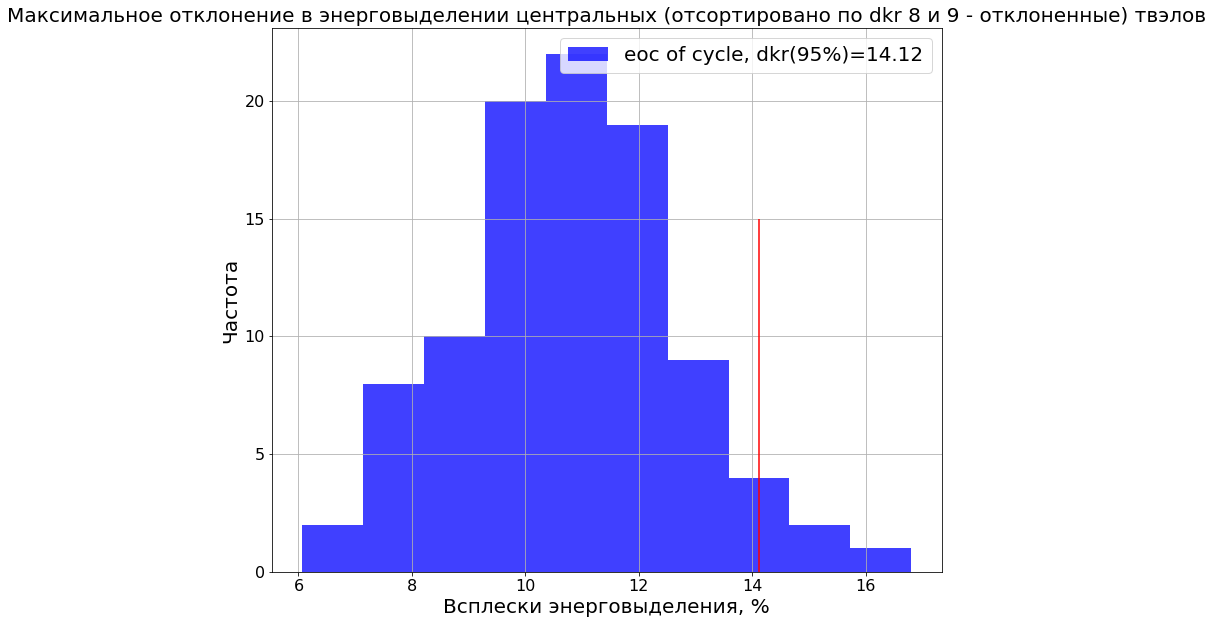

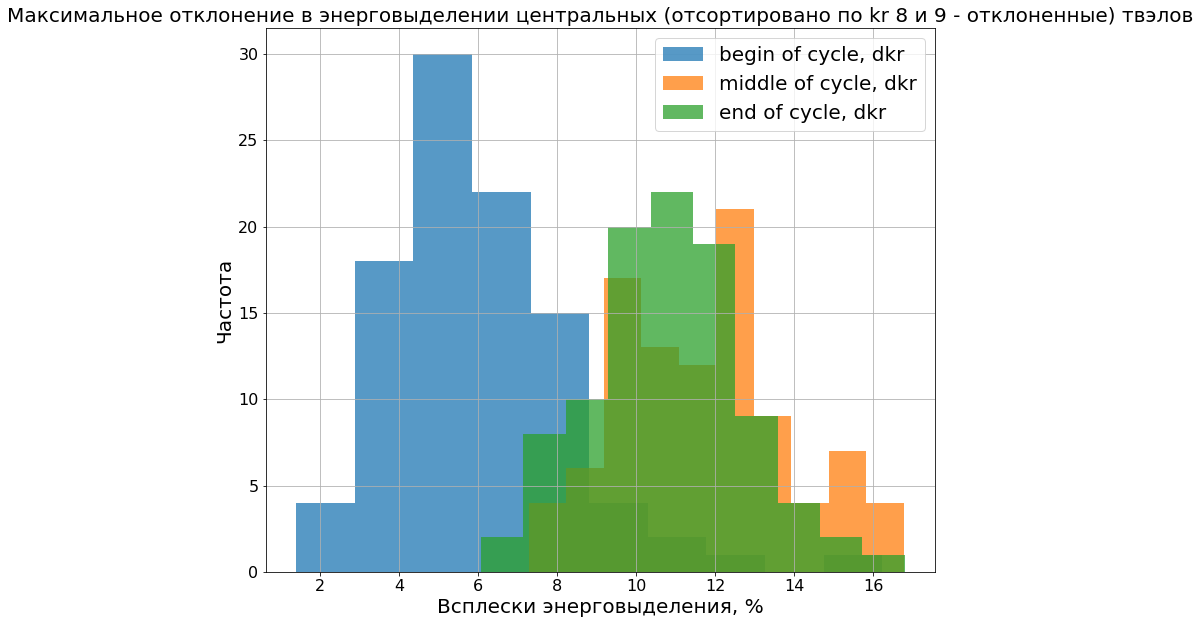

In [58]:
_b_table = pd.read_csv(_path + '_boc_cen_8d9d_table_april.csv');
_m_table = pd.read_csv(_path + '_moc_cen_8d9d_table_april.csv');
_e_table = pd.read_csv(_path + '_eoc_cen_8d9d_table_april.csv');
b1 = GetMaximumFromStateKK(_b_table)
m1 = GetMaximumFromStateKK(_m_table)
e1 = GetMaximumFromStateKK(_e_table)
PlotSeries('dkr','boc of cycle', b1, "центральных (отсортировано по dkr 8 и 9 - отклоненные)")
PlotSeries('dkr','moc of cycle', m1, "центральных (отсортировано по dkr 8 и 9 - отклоненные)")
PlotSeries('dkr','eoc of cycle', e1, "центральных (отсортировано по dkr 8 и 9 - отклоненные)")
PlotSeriesArray('dkr','of cycle',  "центральных (отсортировано по kr 8 и 9 - отклоненные)", b1,m1,e1)

16.537292042791222


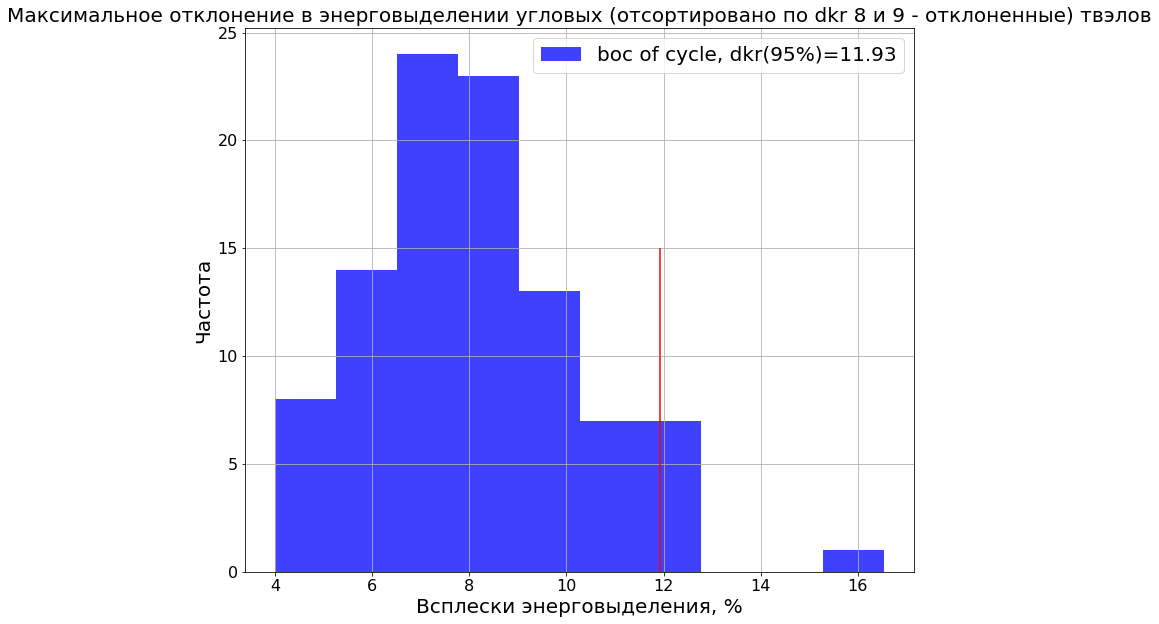

17.84714620170287


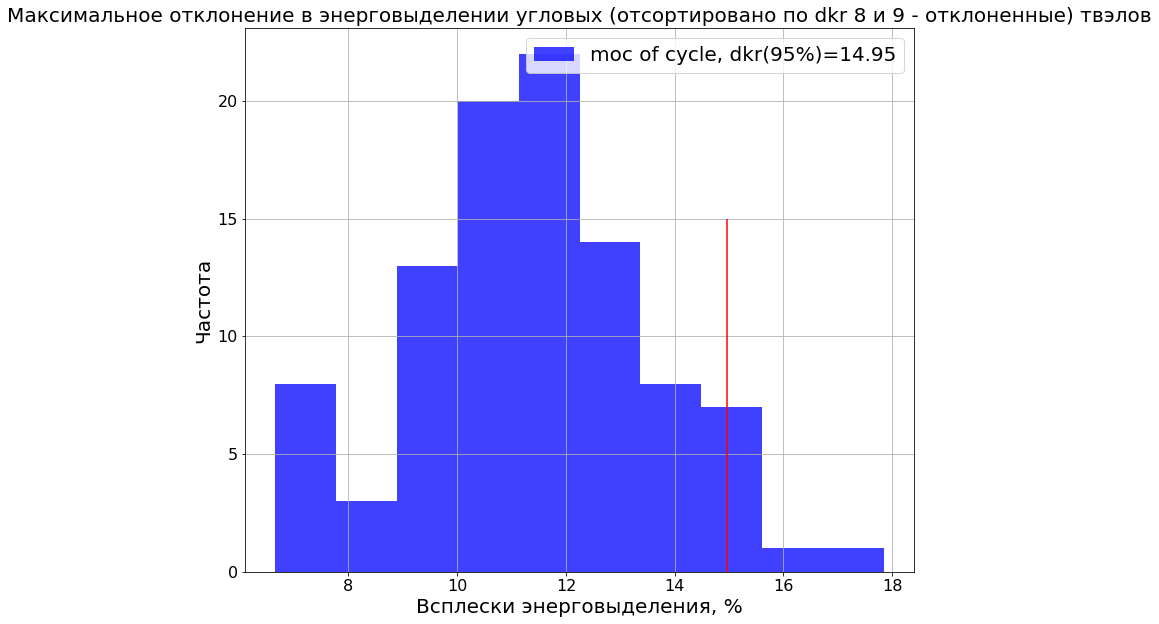

18.2549254514957


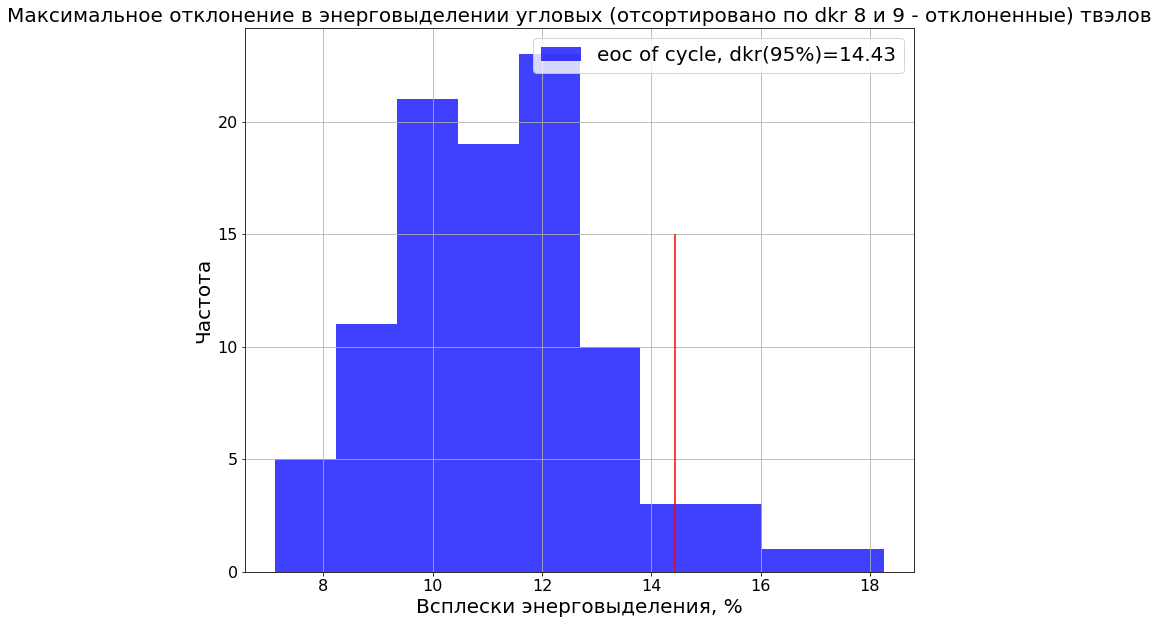

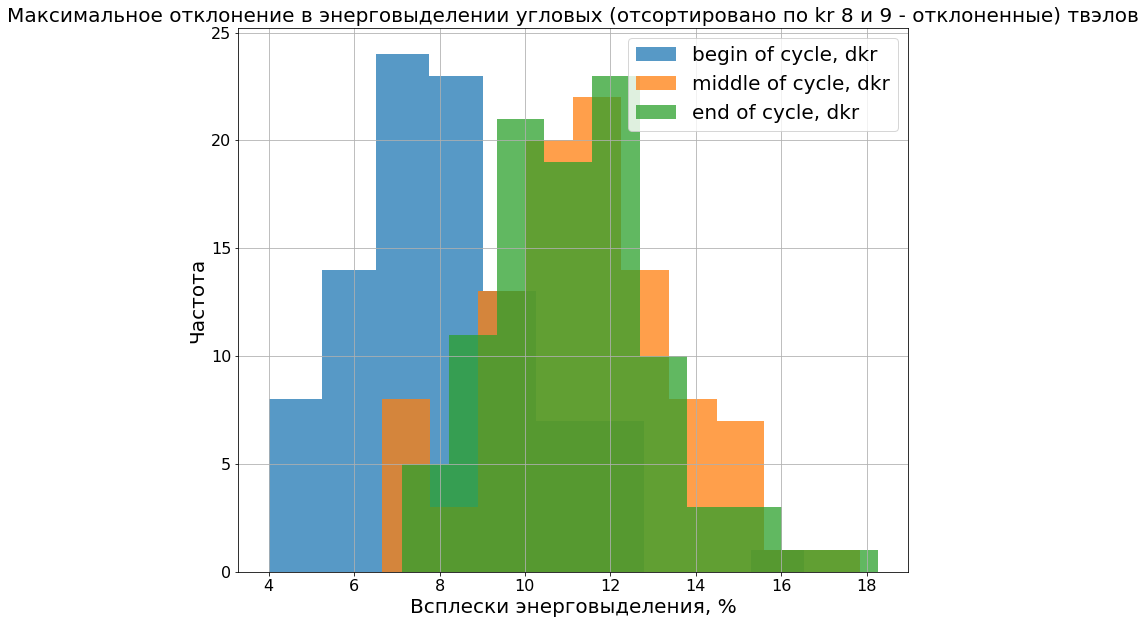

In [57]:
_b_table = pd.read_csv(_path + '_boc_cor_8d9d_table_april.csv');
_m_table = pd.read_csv(_path + '_moc_cor_8d9d_table_april.csv');
_e_table = pd.read_csv(_path + '_eoc_cor_8d9d_table_april.csv');
b1 = GetMaximumFromStateKK(_b_table)
m1 = GetMaximumFromStateKK(_m_table)
e1 = GetMaximumFromStateKK(_e_table)
PlotSeries('dkr','boc of cycle', b1, "угловых (отсортировано по dkr 8 и 9 - отклоненные)")
PlotSeries('dkr','moc of cycle', m1, "угловых (отсортировано по dkr 8 и 9 - отклоненные)")
PlotSeries('dkr','eoc of cycle', e1, "угловых (отсортировано по dkr 8 и 9 - отклоненные)")
PlotSeriesArray('dkr','of cycle',  "угловых (отсортировано по kr 8 и 9 - отклоненные)", b1,m1,e1)

In [39]:
for i in range(0,100):
    print(i,'{:.2f}'.format(b1[i]));

0 9.05
1 5.21
2 7.19
3 6.80
4 10.74
5 4.00
6 6.64
7 11.75
8 9.13
9 7.91
10 10.09
11 9.75
12 9.08
13 7.42
14 7.88
15 7.36
16 6.39
17 47.86
18 5.89
19 12.07
20 8.28
21 6.97
22 5.54
23 6.55
24 12.75
25 8.03
26 7.93
27 7.87
28 11.85
29 11.39
30 6.08
31 9.92
32 9.76
33 6.41
34 7.33
35 5.79
36 10.52
37 8.56
38 7.51
39 9.43
40 4.58
41 5.43
42 8.42
43 8.98
44 9.98
45 7.46
46 5.03
47 12.42
48 7.92
49 4.49
50 9.21
51 6.70
52 7.93
53 7.96
54 6.32
55 11.90
56 8.84
57 6.33
58 7.25
59 6.91
60 7.63
61 12.58
62 6.41
63 7.43
64 6.72
65 8.95
66 16.54
67 8.25
68 9.16
69 4.98
70 8.46
71 11.22
72 7.84
73 6.52
74 11.03
75 9.80
76 10.68
77 9.86
78 8.42
79 8.43
80 6.72
81 6.38
82 4.11
83 8.48
84 6.13
85 5.86
86 6.56
87 7.03
88 7.12
89 6.24
90 6.74
91 8.41
92 4.20
93 8.24
94 7.24
95 8.41
96 7.66


IndexError: list index out of range